## Solutions (DAY 3)

## K-Means Clustering

In [ ]:
# Make a cluster following the example on the pggm dataset using variables of GICS_Sector and Price_USD variable

#### Methodology
<ol>
<li> Import the data and investigate the number of unique classes of GiSC_Sector.
<li> Re-encode the Gisc-sector variable to numerical classes and save as a new colum called sector
<li> Display the elbow method plot.
<li> Display the Clustering plot.
</ol>

What do you notice on the elbow plot? Any comments on the clustering plot?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Location of dataset
url = 'http://bit.ly/PGGM_dataset'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [12]:
irisdata['GICS_Sector'].unique()

array(['Industrials', 'Utilities', 'Information Technology',
       'Health Care', 'Financials', 'Consumer Staples',
       'Consumer Discretionary', 'Materials', 'Energy',
       'Communication Services', 'Real Estate'], dtype=object)

In [13]:
from sklearn import preprocessing 

print("Samples: {}, Features: {}".format(*irisdata.shape))
 
le = preprocessing.LabelEncoder()
temp = irisdata['GICS_Sector']

le.fit(temp)
irisdata['Sector'] = le.transform(temp)#temp.apply(le.fit_transform)
irisdata.head()

Samples: 38304, Features: 18


,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Sector
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,6
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,10
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,6
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,6
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,10


C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


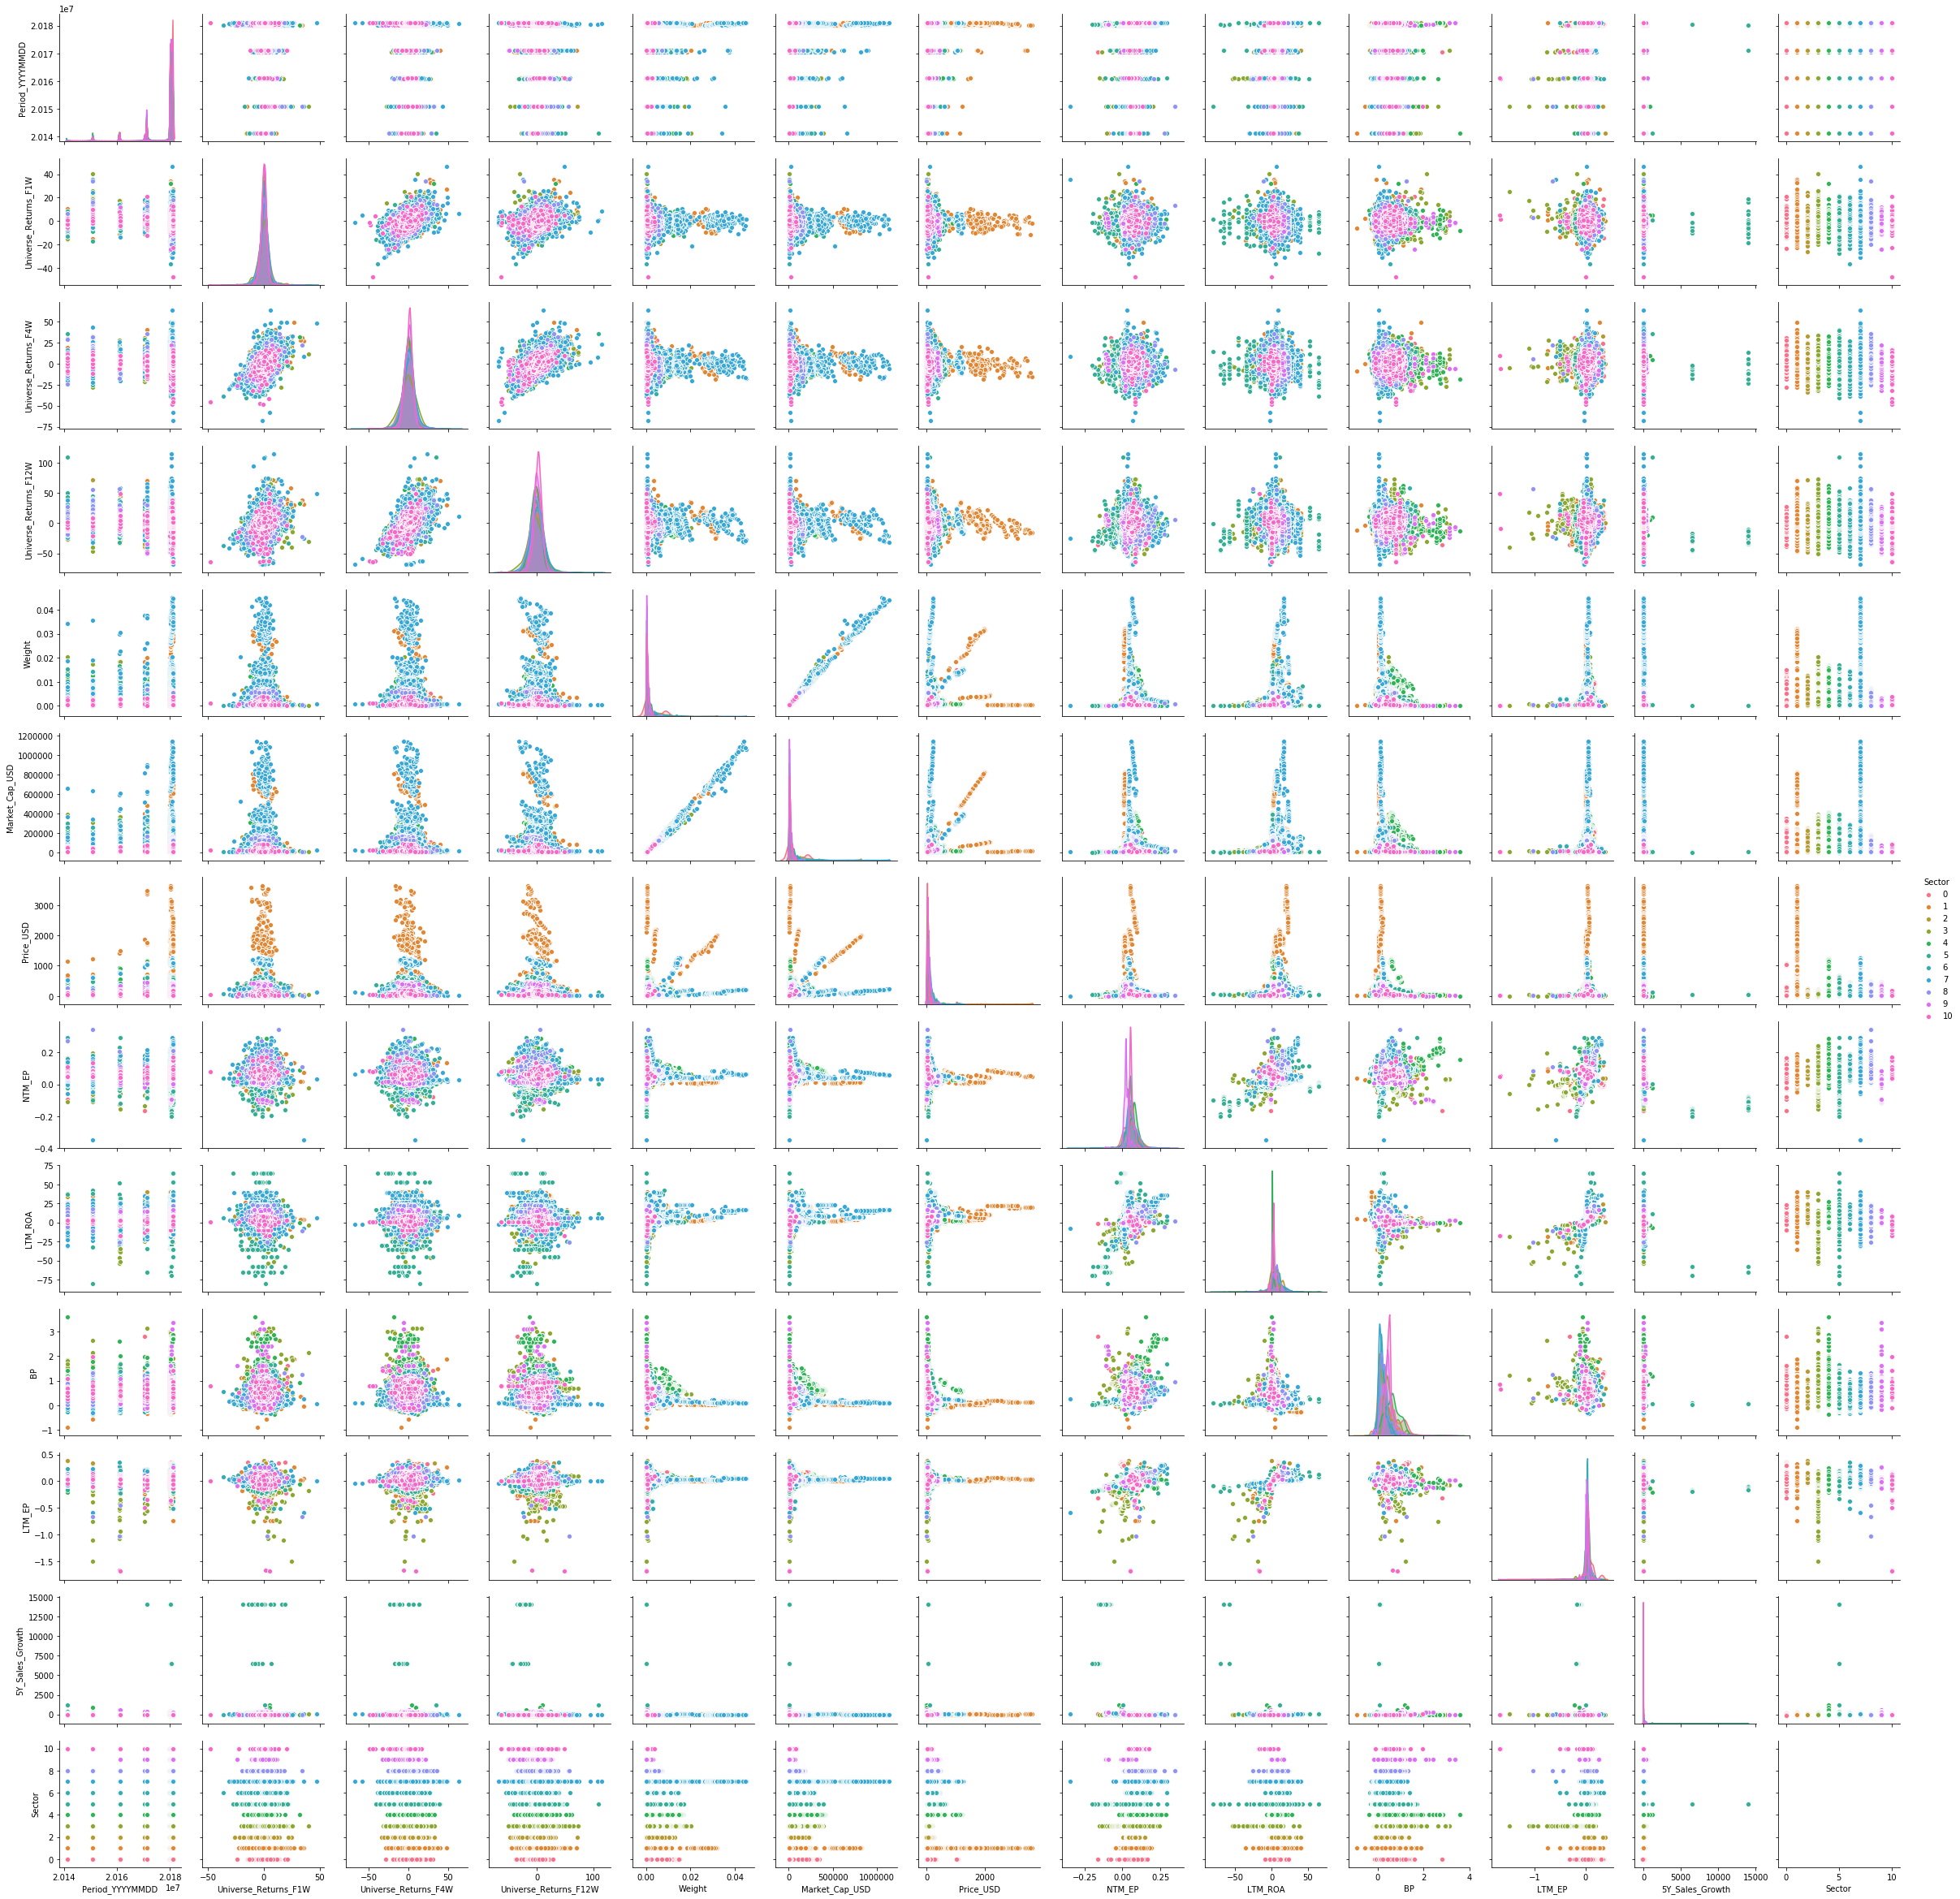

In [14]:
import seaborn as sns
g = sns.pairplot(irisdata, hue="Sector")
g

In [48]:
X = irisdata.iloc[:, [12, 8]].values

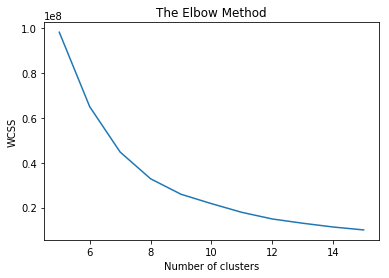

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++', random_state = 32)
y_kmeans = kmeans.fit_predict(X)

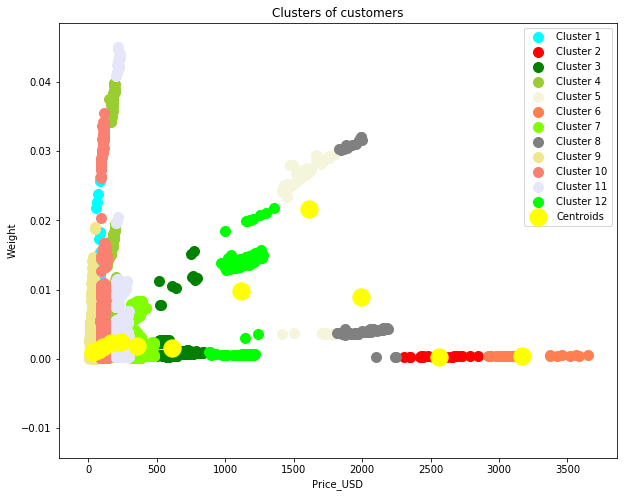

In [55]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price_USD')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [3]:
# Try the same procedure using a variable called Sector from re-encoding/transforming GISC_Sector into numerical values from 0 to its total number of unique values and NTM_EP

In [56]:
# Remove missing data
irisdata = irisdata.dropna()

X = irisdata.iloc[:, [18, 13]].values

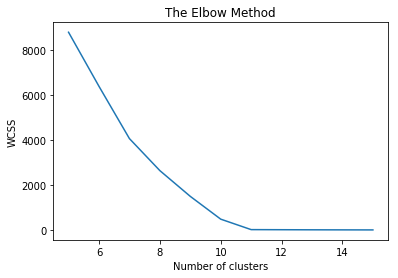

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++', random_state = 32)
y_kmeans = kmeans.fit_predict(X)

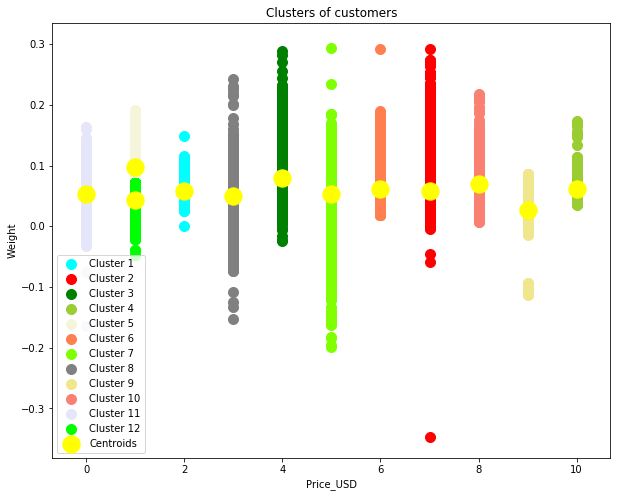

In [59]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price_USD')
plt.ylabel('Weight')
plt.legend()
plt.show()

## Clustering Metric

In [ ]:
# From the first exercise, provide a silouhette sample plot and comment about it.

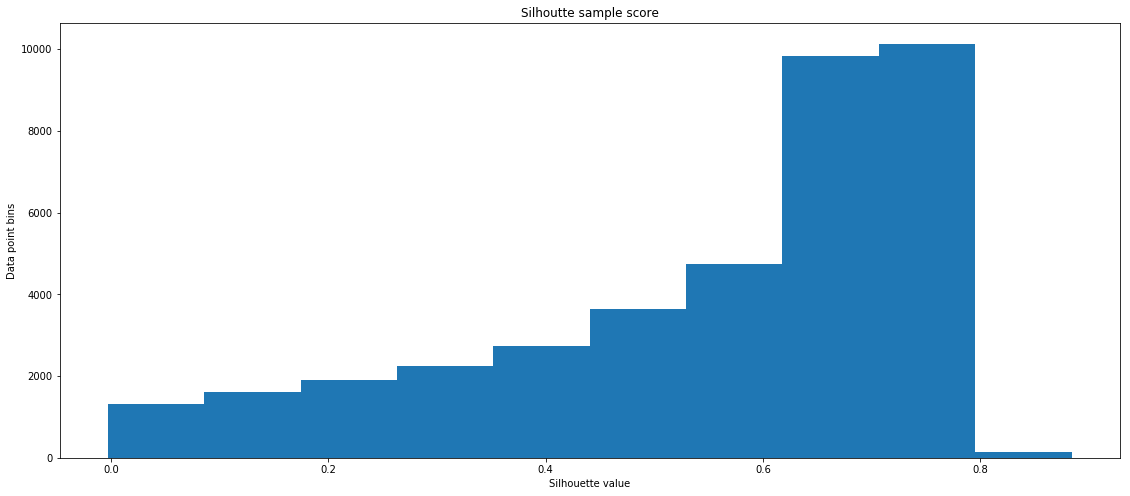

In [54]:
# visualize silhoutte sample scores
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(19, 8))
sample_score = silhouette_samples(X, y_kmeans)
plt.hist(sample_score)
plt.title("Silhoutte sample score")
plt.xlabel("Silhouette value")
plt.ylabel("Data point bins")
plt.show()

## Neural Networks

In [1]:
# Make an equivalent NN model for regression on the actual sales growth values using scikit-learn's MLPRegressor in a similar way as the example in the NN notebook
# Hint: Copy and run the notebook for neural networks first

In [19]:
# Remove missing data
irisdata = irisdata.dropna()

# Assign data from fifth column to 8th variable ()
X = irisdata.iloc[:, 5:9]

# Assign data from our new categorical columns to y variable
y = irisdata.iloc[:, 18] 

In [23]:
y = irisdata.iloc[:, 17] 

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [25]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [26]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(
    hidden_layer_sizes=(50,3),
    activation='logistic',
    solver='sgd',
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.3,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
clf.fit(X_train, y_train)  

Iteration 1, loss = 49680.93108411
Validation score: -0.618584
Iteration 2, loss = 49342.66667812
Validation score: -0.000217
Iteration 3, loss = 49369.37152173
Validation score: -0.066300
Iteration 4, loss = 49493.62967812
Validation score: -0.000433
Iteration 5, loss = 49453.57242762
Validation score: -0.002613
Iteration 6, loss = 49290.50138036
Validation score: -0.008259
Iteration 7, loss = 49455.59580209
Validation score: -0.000758
Iteration 8, loss = 49451.04490135
Validation score: -0.000412
Iteration 9, loss = 49433.91747827
Validation score: -0.001715
Iteration 10, loss = 49115.60971099
Validation score: -0.000471
Iteration 11, loss = 49488.52028578
Validation score: -0.000022
Iteration 12, loss = 49400.63141241
Validation score: -0.001218
Iteration 13, loss = 49269.37586553
Validation score: -3.388255
Iteration 14, loss = 49804.59134034
Validation score: -0.001351
Iteration 15, loss = 50800.27153939
Validation score: -0.000912
Iteration 16, loss = 51442.40253870
Validation sc

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 3), learning_rate='adaptive',
       learning_rate_init=0.3, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.2, verbose=10, warm_start=False)

In [27]:
predictions = clf.predict(X_test)  

In [31]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions))
print("Test set score: %.3f" % clf.score(X_test, y_test))

125761.14378376836
Test set score: -0.000


## General

**Describe the main principles of the following terms in short and concise words :**
- unsupervised learning
- supervised learning
- inputs/features/predictors/independent variables
- outcome/response/dependent variables
- quantitative variable
- qualitative/categorical variable
- classification
- regression
- training data
- test data
- prediction
- inference
- parametric models
- non-parametric models

**Why do we need model validation?**

**What is your current opinion on the statement that machine learning and AI is or will soon be ready to overtake humans given all you now know about how it is done?**

$$\hat{Y} = \hat{f}(X)$$

**Supervised learning**

The training data has outcome labels(Y) for the inputs(X) for data science.

**Unsupervised learning**

The training data consists only of inputs(X) which makes us only be able to explore possible internals structures in the data.

**Inputs/features/predictors/independent variables**

The variables used by data science techniques to estimate its relationship with respect to some outcome or learn from.

**Outcome/response/dependent variables**

The output variable that we want to predict of learn how it is affected by so other variables.

**Quantitative variable**

Real valued variable

**Qualitative/categorical variable**

discrete and finite usuallyy non-numerical valued variable

**Classification**

The outcome variable(Y) for suprvised learning is categorical.

**Regression**

The outcome variable(Y) for suprvised learning is quantitative.

**Training data**

observed set of different data points using for data science (to estimate f).

**Test data**

A subset of the total training data put aside and not used directly to train a model for validation of the model.

**Prediction**

In many situations, a set of inputs X are readily available, but the output
Y cannot be easily obtained. In this setting, since the error term averages
to zero. In essence we are more interesdeted in detrmining the value of Y for any inputs we encounter.

**Inference**

We are often interested in understanding the way that Y is affected as
X change. In this situation we wish to estimate f, but our goal is
not necessarily to make predictions for Y . We instead want to understand
the relationship between X and Y , or more specifically, to understand how
Y changes as a function of X

**Parametric models**

we make an assumption about the functional form of the relationship(f) between the input and outcome (e.g f is linear), then we estimate the parameters of the assumed function to fit to the training data.

**Non parametric models**

Non-parametric models do not make explicit assumptions about the functional
form of f. Instead they seek an estimate of f that gets as close to the
data points as possible without being too rough or wiggly.


##### We need model validation to ensure our estimated function can generalize to unseen inputs which is what the model will encounter in a real life scenario of application of a model.